In [1]:
import numpy as np
from math import *
import time
from PIL import Image
from PIL import ImageDraw
from PIL import ImageColor
import IPython.display

In [2]:
def july(x, y):
    return(x * x - y * y, 2 * x * y - 0.2)

In [2]:
def func(x, y):
    return(x * ((2 - x * x) ** (1 / 16)), 0.5 * y)

In [3]:
def get_num(x, y):
    global x_0, y_0, d, N
    y = np.where(x < x_0, 3, y)
    x = np.where(x < x_0, -3, x)
    
    y = np.where(x > -x_0, 3, y)
    x = np.where(x > -x_0, -3, x)
    
    x = np.where(y < -y_0, -3, x)
    y = np.where(y < -y_0, 3, y)
    
    x = np.where(y > y_0, -3, x)
    y = np.where(y > y_0, 3, y)
    
    i = ((y_0 - y) // d * N) + ((x - x_0) // d) + 1
    i = np.where(i < 0, 0, i)
#     return i[np.where(i > 0)]
    return i

In [4]:
# Function for 7th lab

def make_graph():
    global x_0, y_0, d, N
    d = 0.01
    N = int(round(2.4 / d))
    x_0, y_0 = -1.2, 1.2
    
    graph = {}
    pattern_x = np.ones((10, 10)) * np.array(range(1, 11)) * 0.1 * d - d / 20
    pattern_y = pattern_x.copy().transpose()
    n = 1
    y_n = y_0
    while(y_n > round(-y_0 + d, 4)):
#         print('\n', y_n, '>=', -y_0 + d)
        x_n = x_0
        y_n = round(y_0 - ((n - 1) // N) * d, 4)
        while(x_n < round(-x_0 - d, 4)):
#             print(x_n, '<=', round(-x_0 - d, 4))
            x_n = round(x_0 + ((n - 1) % N) * d, 4)
#             print(n, 'x_n =', x_n)
#             print('1', x_n, y_n, n)
            s = set(np.unique(get_num(*func(x_n + pattern_x, y_n - pattern_y)).astype('int32')))
#             print('2', x_n, y_n, n)
            graph[n] = s
            n += 1
#         y_n -= d
    return graph

In [6]:
# July function

def make_graph():
    global x_0, y_0, d, N
    d = 0.01
    N = int(4 / d)
    x_0, y_0 = -2, 2
    
    graph = {}
    pattern_x = np.ones((10, 10)) * np.array(range(1, 11)) * 0.1 * d - d / 20
    pattern_y = pattern_x.copy().transpose()
    n = 1
    y_n = y_0
    while(y_n > -y_0 + d + 0.0000001):
#         print(y_n, -y_0 + d)
        x_n = x_0
        y_n = y_0 - ((n - 1) // N) * d
        while(x_n < -x_0 - d - 0.0000001):
#             print(x_n, -x_0 - d + 0.001)
            x_n = x_0 + ((n - 1) % N) * d
#             print('1', x_n, y_n, n)
            s = set(np.unique(get_num(*july(x_n + pattern_x, y_n - pattern_y)).astype('int32')))
#             print('2', x_n, y_n, n)
            graph[n] = s
            n += 1
#         y_n -= d
    return graph

In [7]:
def make_graph():
    global x_0, y_0, d, N
    graph = {}
    f = open('graph', 'r')
    for line in f:
        line = line.strip().split(': ')
        graph[int(line[0])] = eval(line[1])
    x_0, y_0 = -2, 2
    d = 0.005
    N = int(4 / d)
    return graph

In [5]:
def invert_graph(graph):
    i_graph = dict.fromkeys(graph.keys(), 0)
    for k, v in graph.items():
        for vertice in v:
            if i_graph[vertice]:
                i_graph[vertice].add(int(k))
            else:
                i_graph[vertice] = {int(k)}
    for k, v in i_graph.items():
        if v == 0:
            i_graph[k] = set()
    return i_graph

In [6]:
def dfs1(graph, v, comp, visited, leave):
    global cur_time
    visited[v] = True
#     cur_time += 1
    for e in graph[v]:
        if not visited[e]:
            dfs1(graph, e, comp, visited, leave)
    cur_time += 1
    leave[v] = cur_time
    comp.append(v)

In [7]:
def dfs2(graph, v, comp, visited):
    visited[v] = True
    for e in graph[v]:
        if not visited[e]:
            dfs2(graph, e, comp, visited)
    comp.append(v)

In [12]:
def topo2(graph):
    global cur_time
    n = N * N
    
    visited = [False] * (n + 1)
    cur_time = 0
    leave = [0] * (n + 1)
    coms = []
    
    for i in range(1, n + 1):
        if (i in graph.keys() and (not visited[i])):
            comp = []
            dfs1(graph, i, comp, visited, leave)
            coms.append(comp)
            
#     print(coms)
            
    sorted_graph = list(np.argsort(np.array(leave)))[::-1]
    
    print(sorted_graph[0])
    
    i_graph = invert_graph(graph)
    no = 0
    
    visited = [False] * (n + 1)
    
    new_graph = []
    
    for v in sorted_graph[:-1]:
        if not visited[v]:
            
            co = []
            dfs2(i_graph, v, co, visited)
            h = co

            new_graph.append(h)

    return new_graph

In [8]:
def topo(graph):
    global cur_time
    n = N * N
    
#     graph[640001] = {0}
#     graph[0] = {640001}
    
    visited = [False] * (n + 1)
#     visited[0] = True
    cur_time = 0
    leave = [0] * (n + 1)
    coms = []
    
    for i in range(1, n + 1):
        if (i in graph.keys() and (not visited[i])):
            comp = []
            dfs1(graph, i, comp, visited, leave)
            coms.append(comp)
            
    sorted_graph = list(np.argsort(np.array(leave)))[::-1]
#     new_nums = [0] * (n + 1)
    
    
    print(sorted_graph[0])
    
    i_graph = invert_graph(graph)
    no = 0
    
    visited = [False] * (n + 1)
    
    new_graph = []
    
    for v in sorted_graph[:-1]:
        if not visited[v]:
            
#             if len(i_graph[v]) > 0:
            co = []
            dfs2(i_graph, v, co, visited)
            h = co
#             else:
#                 h = [v]
#                 visited[v] = True
                
            new_graph.append(h)

#             for k in range(len(h)):
#                 new_nums[h[k]] = no + k + 1
# #                 print(h[k], no + k + 1)
#                 visited[h[k]] = True
#             no += len(h)
        
#     visited = [False] * (n + 1)
    
#     c = []
    
#     print(coms[-1][-1])

#     for comp in coms[::-1]:
#         for v in comp[::-1]:
#             if not visited[v]:
#                 co = []
#                 dfs2(i_graph, v, co, visited)
#                 c.append(co)                    
    return new_graph

In [9]:
def scale(x, y):
    return (x + 1.2) * width // 2.4, height - (y + 1.2) * height // 2.4

def fill_square(number, d, color):
    y, x = divmod(number - 1, N)
    x, y = x_0 + x * d, y_0 - y * d
    draw.rectangle((*scale(x, y), *scale(x + d, y - d)), fill=color)
    
def draw_grid():
    x, y = 0, 0
    if d > 0.009:
        while x < width:
            x += width / 24
            draw.line((x, 0, x, height), fill=ImageColor.getrgb("grey"))
        while y < height:
            y += height / 24
            draw.line((0, y, width, y), fill=ImageColor.getrgb("grey"))
            
    draw.line((50, 0, 50, height), fill="black");
    draw.line((550, 0, 550, height), fill="black");
    draw.line((0, 50, width, 50), fill="black");
    draw.line((0, 550, width, 550), fill="black");
            
def draw_axis():
    zero_x = width / 2
    zero_y = height / 2

    draw.line((0, zero_x, height, zero_x), fill="black") #, width=2)
    draw.line((zero_y, 0, zero_y, width), fill="black")#, width=2)

In [68]:
def draw_scc(scc, ar, grid=False, axis=False, save=True):
    global height, width, draw, cntr, cntr_edges
    height, width = 600, 600
    image = Image.new("RGB", (width, height))
    draw = ImageDraw.Draw(image)
    draw.rectangle((0, 0, width, height), fill='white') 
    
#     if grid:
#         draw_grid()
        
#     if axis:
#         draw_axis()
        
#     k = 0
#     cntr = 0
#     cntr_edges = 0
#     for v in scc[np.argsort([len(comp) for comp in scc])[-1]]:
    colors = [(255, 0, 0), (255, 120, 0), (200, 200, 0), (0, 255, 0), (0, 255, 255), (0, 0, 255),
              (120, 0, 255), (255, 0, 255)]
    colors = ["red" , "orange", "green", "blue", "purple"]

#     colors = colors * divmod(len(scc), len(colors))[0] + colors[:divmod(len(scc), len(colors))[1]]
#     for color, c in zip(colors, scc):
    i = 0
    dif_colors = [(255, 255, 255), (170, 170, 170), (100, 100, 100), (30, 30, 30)]
    dif_colors = ["thistle" , "lightpink", "khaki", "lightgreen", "lightblue"]
    
    for a in ar:
        for c in a:
            fill_square(c, d, dif_colors[divmod(i, len(dif_colors))[1]])
        i += 1    
        
    for c in scc:
#         fill_square(c, d, "grey")
#         if len(c) > 1:
#             for v in c:
#                 fill_square(v, d, colors[divmod(i, len(colors))[1]])
#             i += 1
#         else:
#             if i == 0:
#                 fill_square(c[0], d, "grey")
#             else:
#                 fill_square(c[0], d, dif_colors[divmod(i, len(dif_colors))[1]])
        for a in c:
            fill_square(a, d, colors[divmod(i, len(colors))[1]])
        i += 1
        

                
#             i += 1

#     for c in attr_reg:
#         fill_square(c, d, "lightgrey")
#     if grid:
#         draw_grid()
        
    if axis:
        draw_axis()    

    if save:
        im_name = 'image7_3_' + str(N * N) + '.png'
        image.save(im_name, "PNG")

In [9]:
def func():
    global graph, scc, was
    start = time.time()
    graph = make_graph()
    nums = topo(graph)
#     scc = kosaraju(graph)
#     g_time = time.time() - start
#     draw_scc(scc)

In [ ]:
%%time
func()

In [22]:
draw_scc(new_graph)

Wall time: 681 ms


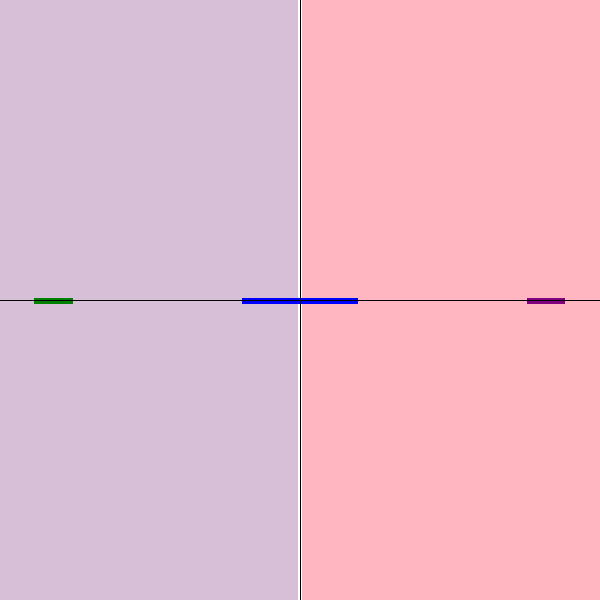

In [73]:
%%time
draw_scc(areas, ar, axis=True, grid=True)
IPython.display.Image(filename='image7_3_' + str(N * N) + '.png') 

In [62]:
stas = [[]]
f = open("topo.txt", 'r')
for line in f:
    line = line.strip().split()
    stas.append([int(i) for i in line[1:]])
stas

[[],
 [],
 [927,
  928,
  929,
  990,
  991,
  992,
  993,
  994,
  1053,
  1054,
  1055,
  1057,
  1058,
  1059,
  1060,
  1061,
  1064,
  1065,
  1066,
  1117,
  1118,
  1119,
  1121,
  1122,
  1123,
  1124,
  1125,
  1126,
  1127,
  1128,
  1129,
  1130,
  1131,
  1132,
  1133,
  1134,
  1135,
  1180,
  1181,
  1182,
  1185,
  1186,
  1187,
  1188,
  1189,
  1190,
  1191,
  1192,
  1193,
  1194,
  1195,
  1196,
  1197,
  1198,
  1199,
  1243,
  1244,
  1245,
  1246,
  1250,
  1251,
  1252,
  1253,
  1254,
  1255,
  1256,
  1257,
  1258,
  1259,
  1260,
  1262,
  1263,
  1264,
  1307,
  1308,
  1309,
  1310,
  1318,
  1319,
  1326,
  1327,
  1328,
  1329,
  1370,
  1371,
  1372,
  1373,
  1374,
  1391,
  1392,
  1393,
  1394,
  1395,
  1432,
  1433,
  1434,
  1435,
  1436,
  1437,
  1438,
  1457,
  1458,
  1459,
  1495,
  1496,
  1497,
  1498,
  1499,
  1500,
  1501,
  1522,
  1523,
  1559,
  1560,
  1561,
  1562,
  1563,
  1564,
  1583,
  1584,
  1585,
  1586,
  1587,
  1588,
  1622

In [162]:
%%time
draw_scc(stas)
IPython.display.Image(filename='image4_2' + str(N * N) + '.png') 

TypeError: draw_scc() missing 1 required positional argument: 'attr_reg'

In [55]:
i_graph = invert_graph(graph)

In [56]:
def dfs3(v, attr_reg):
    visited[v] = True
    for e in i_graph[v]:
        if not visited[e]:
            dfs3(e, attr_reg)
    attr_reg.append(v)

In [59]:
def get_attr(graph, scc):
    global visited
    visited = dict.fromkeys(graph.keys(), False)
    attr_reg = []
    
    for v in scc:
        visited[v] = True

    for v in scc:
        dfs3(v, attr_reg)
#         attr_reg.remove(v)

    return attr_reg

In [146]:
attr_reg = get_attr(graph, [0])

In [144]:
short_scc = []
for c in new_graph:
    if len(c) > 1:
        short_scc += c

In [11]:
%%time
graph = make_graph()

Wall time: 11.9 s


In [12]:
len(graph)

57600

In [13]:
graph[0] = set()

In [14]:
%%time
new_graph = topo(graph)

57600
Wall time: 856 ms


In [15]:
loops = []
for k in graph.keys():
    if k in graph[k]:
        loops.append(k)

In [52]:
areas = []
area = []
for c in loops:
    if not len(area):
        area.append(c)
    else:        
        for v in area:
            inarea = False
            if (c == v - 1) or (c == v + 1) or (c == v - N) or (c == v + N):
                area.append(c)
                inarea = True
                break
        if not inarea:
            areas.append(area)
            area = [c]
areas.append(area)

In [53]:
areas = [areas[0] + areas[3], areas[1] + areas[4], areas[2] + areas[5]]

In [54]:
for a in areas:
    print(len(a))

30
92
30


In [72]:
area1 = get_attr(graph, areas[0])
area2 = get_attr(graph, areas[1])
area3 = get_attr(graph, areas[2])
ar = [area1, area3]

In [39]:
new_graph

[[29026,
  29025,
  29024,
  29023,
  29022,
  29021,
  28922,
  28923,
  28924,
  28925,
  28926,
  28927,
  28928,
  28929,
  28930,
  28931,
  28932,
  28933,
  28934,
  28935,
  28936,
  28937,
  28938,
  28939,
  28940,
  28941,
  28942,
  28943],
 [29012,
  29013,
  29014,
  29015,
  29016,
  29017,
  29018,
  29019,
  29020,
  28921,
  28920,
  28919,
  28918,
  28917,
  28916,
  28915,
  28914,
  28913,
  28912,
  28911,
  28910,
  28909,
  28908,
  28907,
  28906,
  28905,
  28904,
  28903,
  28902,
  28901,
  28900,
  28899,
  28898],
 [28829, 28828, 28827, 28826, 28825, 28824, 28823, 28822, 28821],
 [28815, 28816, 28817, 28818, 28819, 28820],
 [28786],
 [28785],
 [28784],
 [28783],
 [28782],
 [28781],
 [28682,
  28683,
  28684,
  28685,
  28686,
  28687,
  28688,
  28689,
  28690,
  28691,
  28692,
  28693,
  28694,
  28695,
  28696,
  28697,
  28698,
  28699,
  28700,
  28701,
  28702,
  28703],
 [28772, 28773, 28774, 28775, 28776, 28777, 28778, 28779, 28780],
 [28681],
 [2

In [72]:
%%time
k = 0
i = 0
new_g = []
t = []
for c in new_graph:
#     print(c)
    if len(c) == 1:
#         print('ok')
        if not len(t):
            t.append(c[0])
        if c[0] in graph[c[0]]:
            t.append(c[0])
        else:
#             print('append t')
#             
#             if (c[0] not in t) and len(t):
#                 t.append(c[0])
            new_g.append(t)
            t = []
#             print(t, 'has loop', graph[t])
#             i += 1
    else:
        if len(t):
            print('append t')
            new_g.append(t)
            t = []
        print('append c')
        new_g.append(c)
# new_graph = new_g
len(new_g)

Wall time: 343 ms


57448

In [73]:
i = 0
for c in new_g:
    if len(c) > 1:
        i -= 1
    i += len(c)
i

57549

In [300]:
def draw_rainbow(nums, grid=False, axis=False, save=True):
    global height, width, draw, cntr, cntr_edges
    height, width = 800, 800
    image = Image.new("RGB", (width, height))
    draw = ImageDraw.Draw(image)
    draw.rectangle((0, 0, width, height), fill='white')

    r, g, b = 0, 0, 0

    argnums = []
    for n in nums:
        argnums += n
        
#     argnums = np.argsort(np.array(argnums))

    for n in argnums:
        r = round((cos(n / len(nums) * 2 * 3.1415) + 1) * 127)
        g = round((cos((n / len(nums)  + 1 / 3 )* 2 * 3.1415) + 1) * 127)
        b = round((cos((n / len(nums)  + 2 / 3 )* 2 * 3.1415) + 1) * 127)
        
        fill_square(n, d, (r, g, b))

    if axis:
        draw_axis()

    if grid:
        draw_grid()

    if save:
        image.save('test_rainbow.png', "PNG")

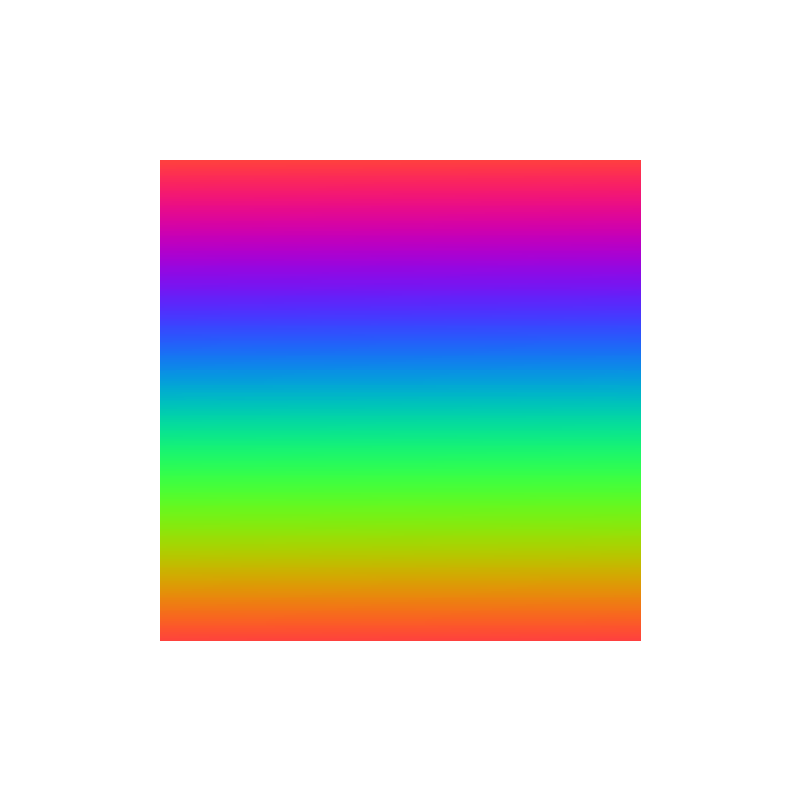

In [301]:
draw_rainbow(new_graph)
IPython.display.Image(filename='test_rainbow.png') 